<h1>Exploring Psychosocial and Lifestyle Determinants of Anxiety and Depression: A Data-Driven Analysis</h1>

<h2>Aim:</h2>
<p> To investigate the relationships between lifestyle, demographic, and psychosocial factors and mental health outcomes—specifically anxiety and depression—using statistical analysis and data modeling. </p>



<h2>Objectives:</h2>
<p> 
    
    1. To assess the influence of demographic variables (e.g., age, gender, education level, employment status) on anxiety and depression scores.
    
    2. To evaluate the role of lifestyle factors such as sleep duration, physical activity, substance use, and medication on mental health outcomes.
    
    3. To examine the correlation between social support, self-esteem, loneliness, and life satisfaction with levels of anxiety and depression.
    
    4. To determine whether work and financial stress significantly predict anxiety and depression levels.
    
    5. To analyze the impact of chronic illness, therapy, and meditation practices on mental health scores. </p>



In [22]:
#Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Reading the dataset
try:
    data = pd.read_csv("anxiety_depression_data.csv")
except: 
    print("File not found")

In [24]:
#Checking the first few rows to see if data successfully imported
data.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [25]:
#Checking the descriptive statistics for numecial variables
data.describe()

,Age,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,Meditation,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
count,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000
mean,46.317500,6.46900,2.005750,5.055000,10.470000,10.674167,5.000833,0.318333,0.26750,0.210000,0.399167,4.992500,4.889167,5.062500,5.12000,4.959167
std,16.451157,1.52955,2.037818,2.652893,5.911138,5.632889,2.538281,0.466024,0.44284,0.407478,0.489931,2.590953,2.547016,2.531587,2.56991,2.566383
min,18.000000,2.00000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,33.000000,5.40000,0.600000,3.000000,5.000000,6.000000,3.000000,0.000000,0.00000,0.000000,0.000000,3.000000,3.000000,3.000000,3.00000,3.000000
50%,46.000000,6.40000,1.400000,5.000000,10.500000,11.000000,5.000000,0.000000,0.00000,0.000000,0.000000,5.000000,5.000000,5.000000,5.00000,5.000000
75%,61.000000,7.50000,2.700000,7.000000,16.000000,15.000000,7.000000,1.000000,1.00000,0.000000,1.000000,7.000000,7.000000,7.000000,7.00000,7.000000
max,74.000000,12.40000,15.100000,9.000000,20.000000,20.000000,9.000000,1.000000,1.00000,1.000000,1.000000,9.000000,9.000000,9.000000,9.00000,9.000000


In [26]:
#Checking for data structure and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

<h3>Data cleaning</h3>
From the information above, we can see that "Medical Use" and "Substance Use" have missing values. 

In [28]:
#Extracting all rows with missing values in Medication use and Substance Use
medication_missing = data[data["Medication_Use"].isna() == True]
substance_missing = data[data["Substance_Use"].isna() == True]


In [29]:
#Filling the missing values in both Medication use and Substance use
full_data = data.fillna("No")

<h2>Exploratory Data Analysis</h2>

In [31]:
#Objective 1: 
# Influence of demographic variables (e.g. gender, education level, employment status) 
# on anxiety and depression scores.

#1. Gender
full_data.groupby('Gender').agg({'Anxiety_Score': ['mean','median','min','max'], 'Depression_Score': ['mean','median','min','max']})


Anxiety_Score                Depression_Score               
                    mean median min max             mean median min max
Gender                                                                 
Female         10.741652   11.0   1  20        10.490334   11.0   1  20
Male           10.167308   10.0   1  20        10.771154   11.0   1  20
Non-Binary     10.644444   11.0   1  20        11.111111   12.0   1  20
Other           9.857143   10.0   1  18        11.380952   13.0   1  20

<Axes: xlabel='Anxiety_Score', ylabel='Density'>

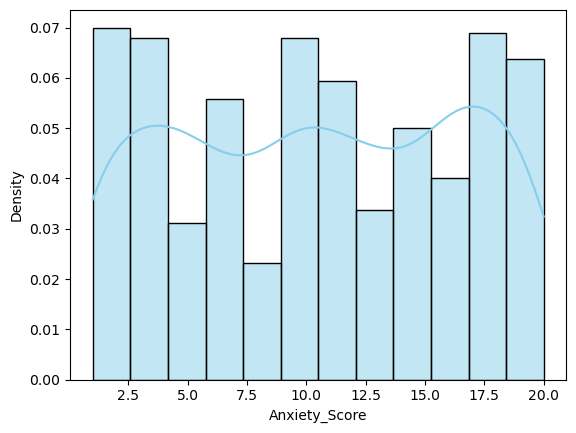

In [63]:
#Checking for the distribution of anxiety score
sns.histplot(full_data['Anxiety_Score'], kde=True, stat="density", color='skyblue', edgecolor='black')

<Axes: xlabel='Depression_Score', ylabel='Density'>

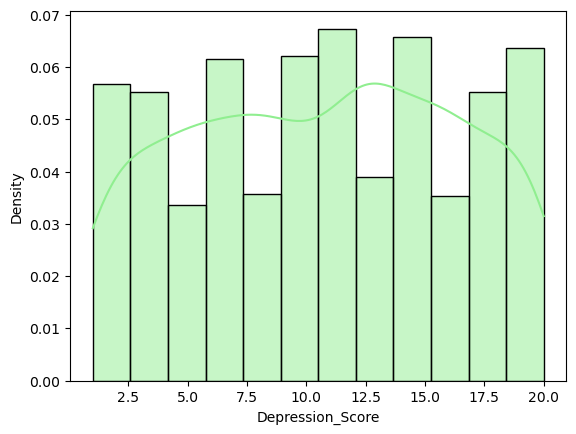

In [77]:
#Checking for the distribution of depression score
sns.histplot(full_data['Depression_Score'], kde=True, stat="density", color='lightgreen', edgecolor='black')

<Axes: xlabel='Anxiety_Score', ylabel='Depression_Score'>

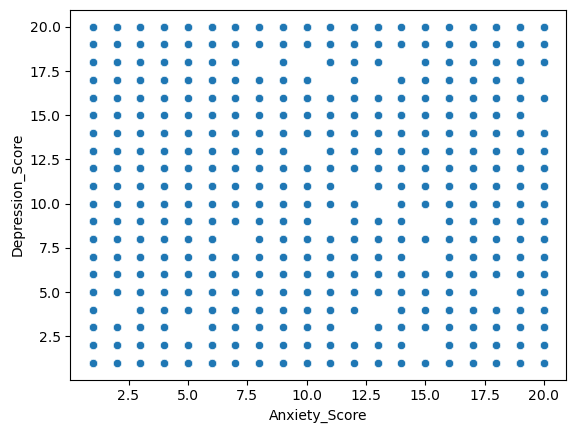

In [93]:
#Checking for the relationship between anxiety and depression score
sns.scatterplot(data=full_data, x='Anxiety_Score', y='Depression_Score')

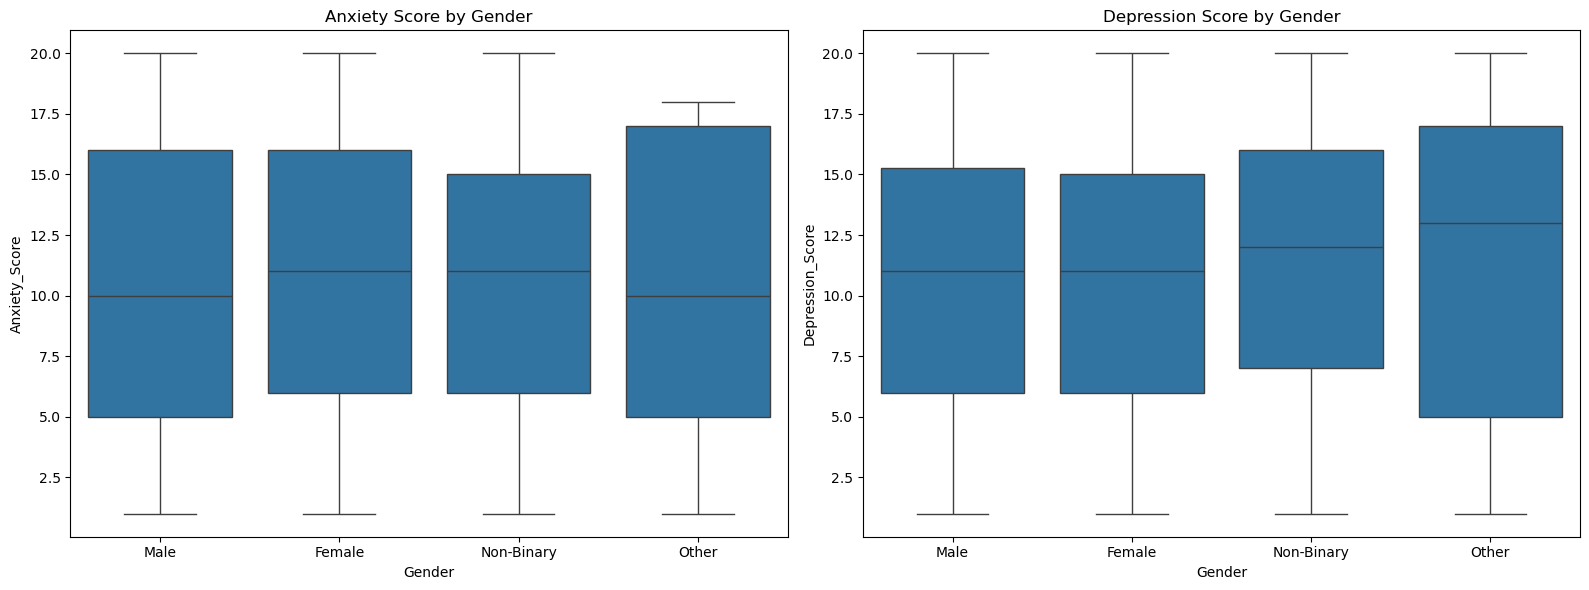

In [33]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=full_data, x='Gender', y='Anxiety_Score', ax=axes[0])
axes[0].set_title('Anxiety Score by Gender')
sns.boxplot(data=full_data, x='Gender', y='Depression_Score', ax=axes[1])
axes[1].set_title('Depression Score by Gender')
plt.tight_layout()
plt.show()

In [34]:
#2. Education Level
full_data.groupby('Education_Level').agg({'Anxiety_Score': ['mean','median','min','max'], 'Depression_Score': ['mean','median','min','max']})


Anxiety_Score                Depression_Score               
                         mean median min max             mean median min max
Education_Level                                                             
Bachelor's          10.649533   11.0   1  20        11.037383   12.0   1  20
High School         10.615702   11.0   1  20        10.681818   11.0   1  20
Master's            10.177686   10.0   1  20        10.772727   12.0   1  20
Other               10.650000   11.0   1  20        10.637500   10.5   1  20
PhD                 10.293893   10.0   1  20        10.312977   10.0   1  20

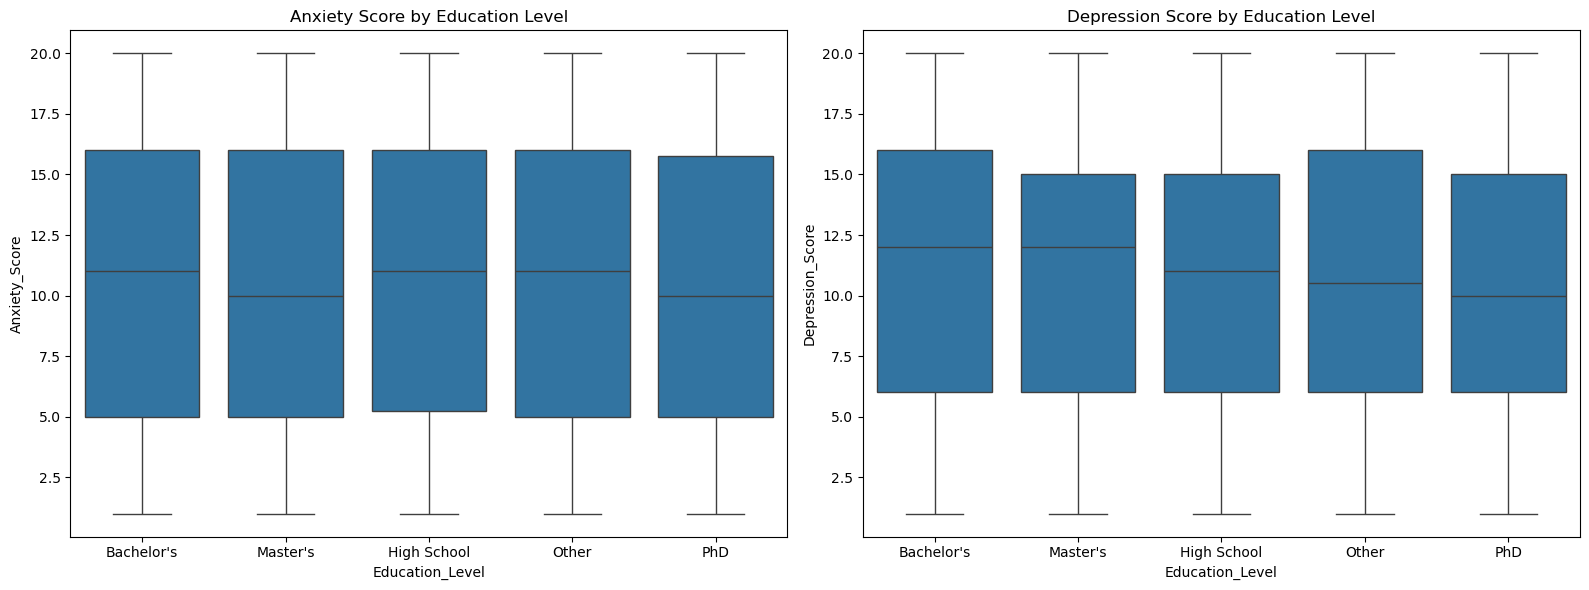

In [35]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=full_data, x='Education_Level', y='Anxiety_Score', ax=axes[0])
axes[0].set_title('Anxiety Score by Education Level')
sns.boxplot(data=full_data, x='Education_Level', y='Depression_Score', ax=axes[1])
axes[1].set_title('Depression Score by Education Level')
plt.tight_layout()
plt.show()

In [36]:
#3. Employment_Status  
full_data.groupby('Employment_Status').agg({'Anxiety_Score': ['mean','median','min','max'], 'Depression_Score': ['mean','median','min','max']})


Anxiety_Score                Depression_Score               
                           mean median min max             mean median min max
Employment_Status                                                             
Employed              10.503125   11.0   1  20        10.600000   11.0   1  20
Retired               10.588652   10.5   1  20        10.663121   11.0   1  20
Student               10.206452   10.0   1  20        10.983871   12.0   1  20
Unemployed            10.600694   10.0   1  20        10.434028   10.0   1  20

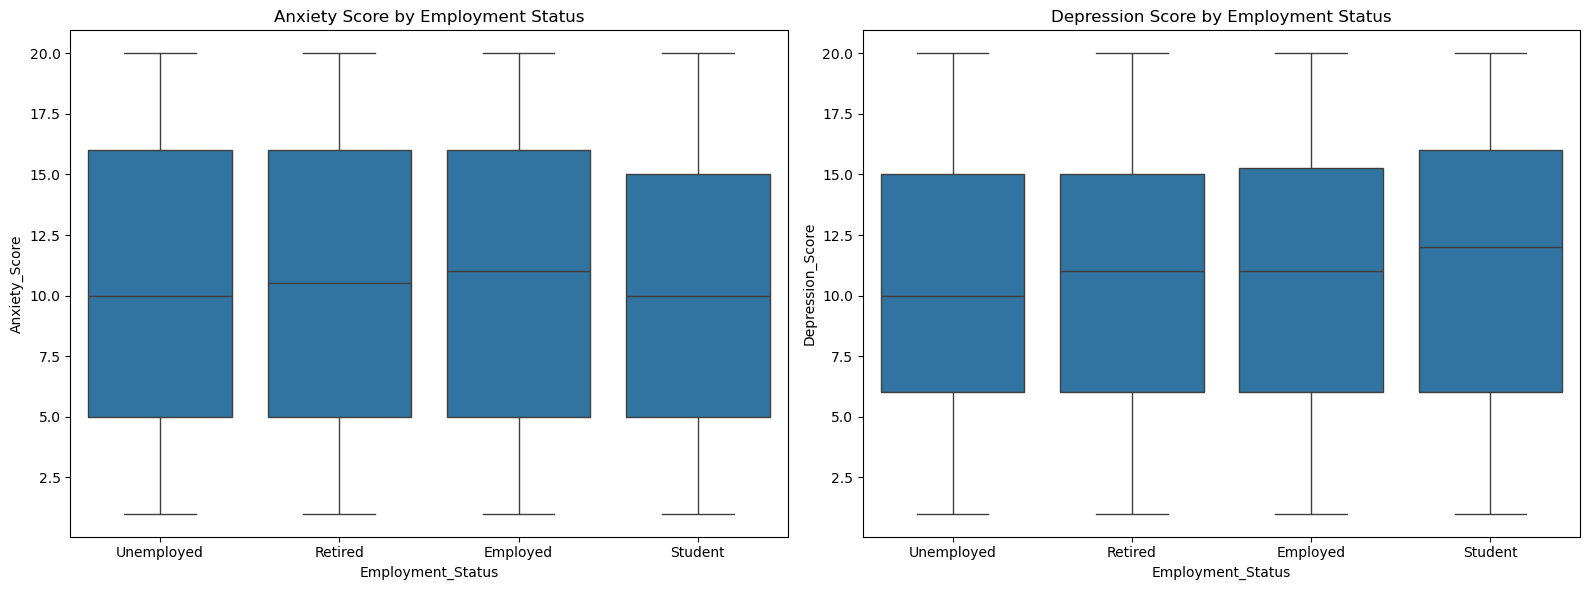

In [37]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=full_data, x='Employment_Status', y='Anxiety_Score', ax=axes[0])
axes[0].set_title('Anxiety Score by Employment Status')
sns.boxplot(data=full_data, x='Employment_Status', y='Depression_Score', ax=axes[1])
axes[1].set_title('Depression Score by Employment Status')
plt.tight_layout()
plt.show()

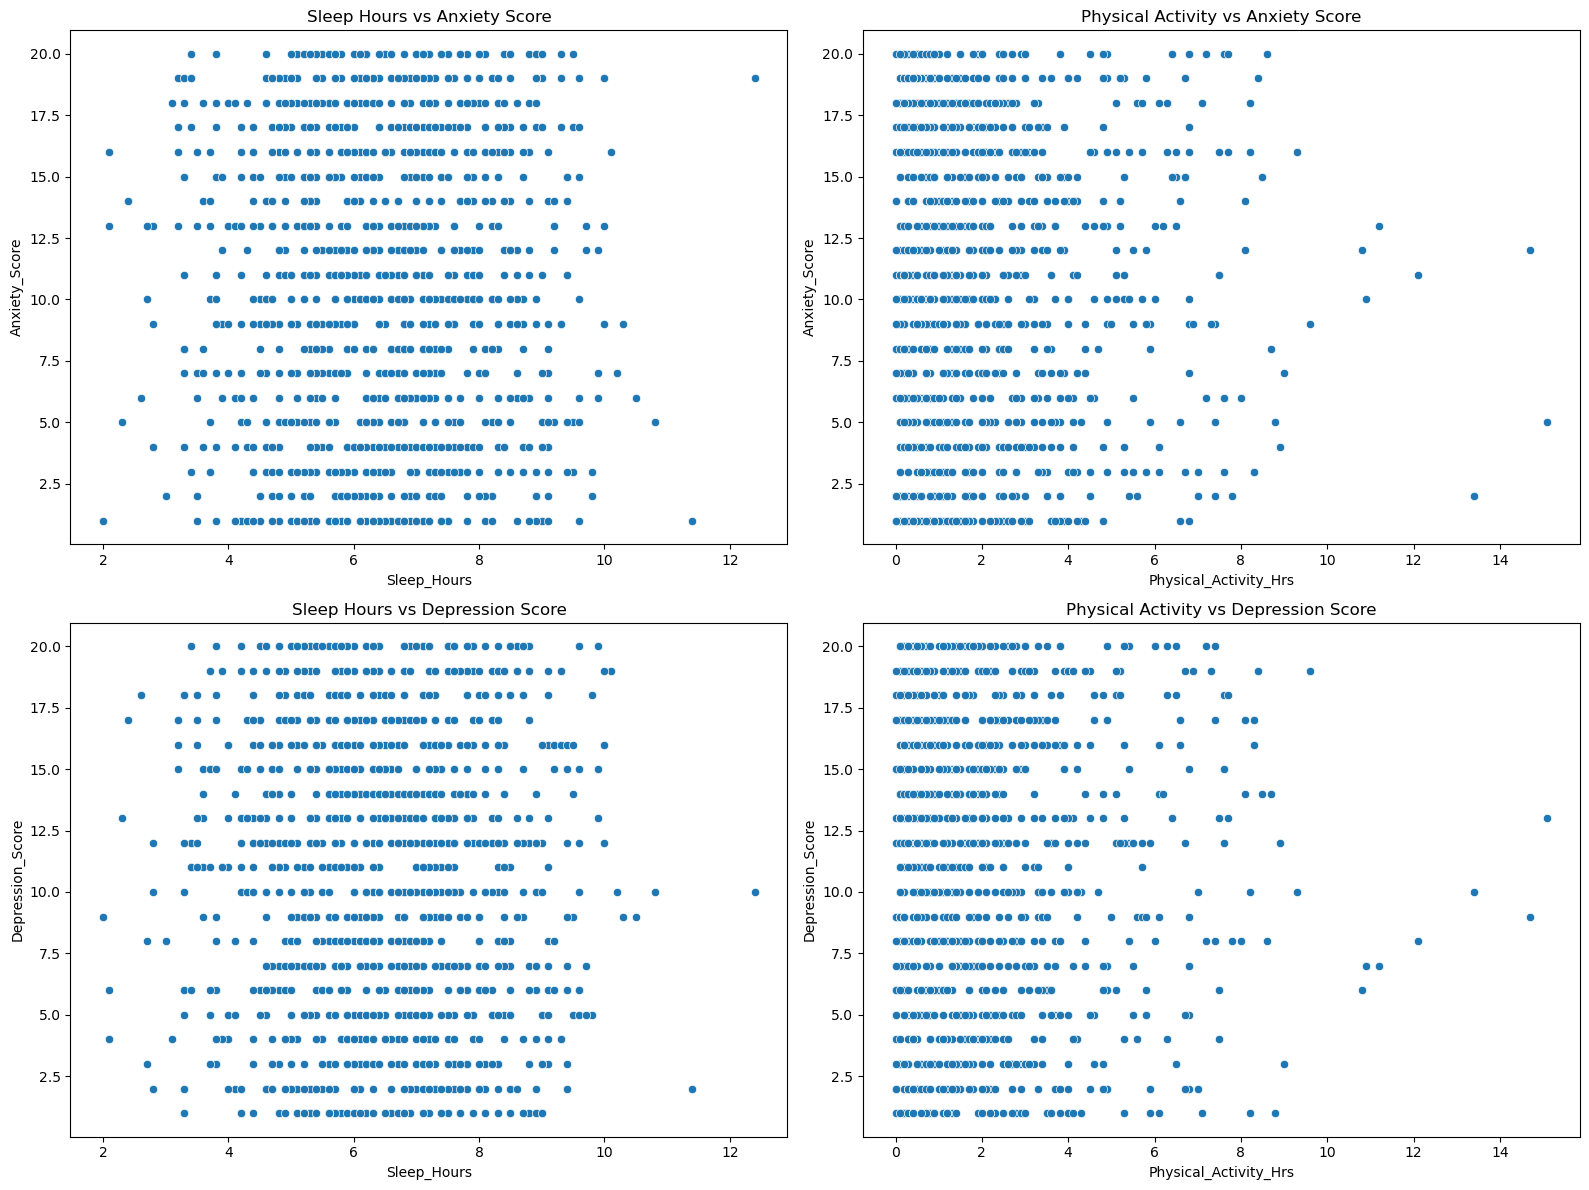

In [38]:
# Objective 2: 
#Lifestyle factors vs Mental Health
# Sleep hours and physical activity vs anxiety and depression
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(data=full_data, x='Sleep_Hours', y='Anxiety_Score', ax=axes[0, 0])
axes[0, 0].set_title('Sleep Hours vs Anxiety Score')
sns.scatterplot(data=full_data, x='Physical_Activity_Hrs', y='Anxiety_Score', ax=axes[0, 1])
axes[0, 1].set_title('Physical Activity vs Anxiety Score')
sns.scatterplot(data=full_data, x='Sleep_Hours', y='Depression_Score', ax=axes[1, 0])
axes[1, 0].set_title('Sleep Hours vs Depression Score')
sns.scatterplot(data=full_data, x='Physical_Activity_Hrs', y='Depression_Score', ax=axes[1, 1])
axes[1, 1].set_title('Physical Activity vs Depression Score')
plt.tight_layout()
plt.show()

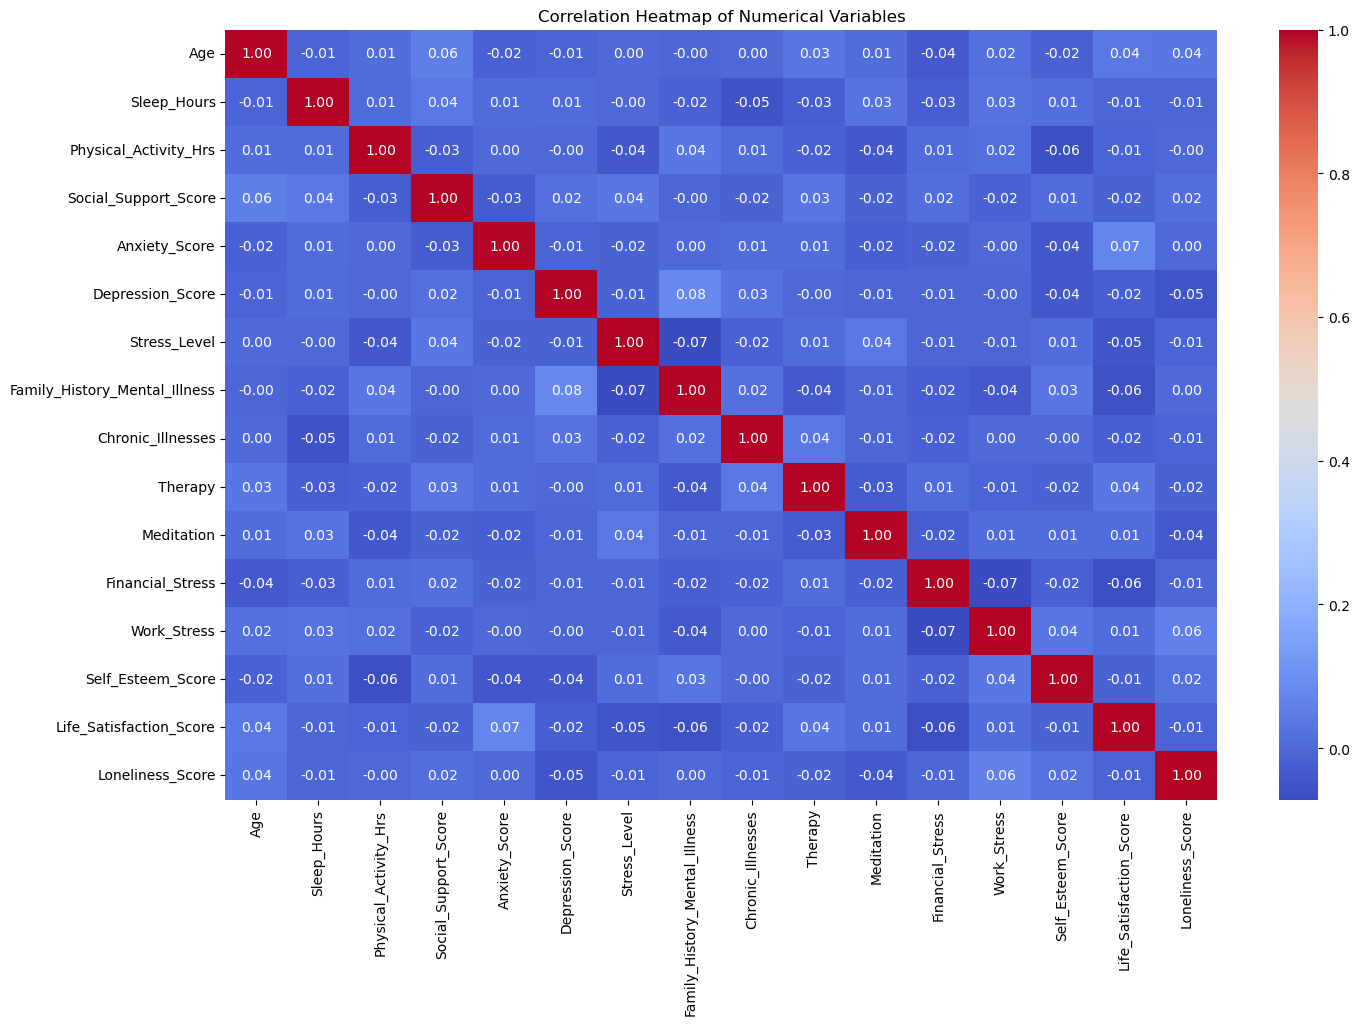

In [39]:
# Objective 3: 
# Correlation between social factors and mental health)
plt.figure(figsize=(16, 10))
correlation = full_data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

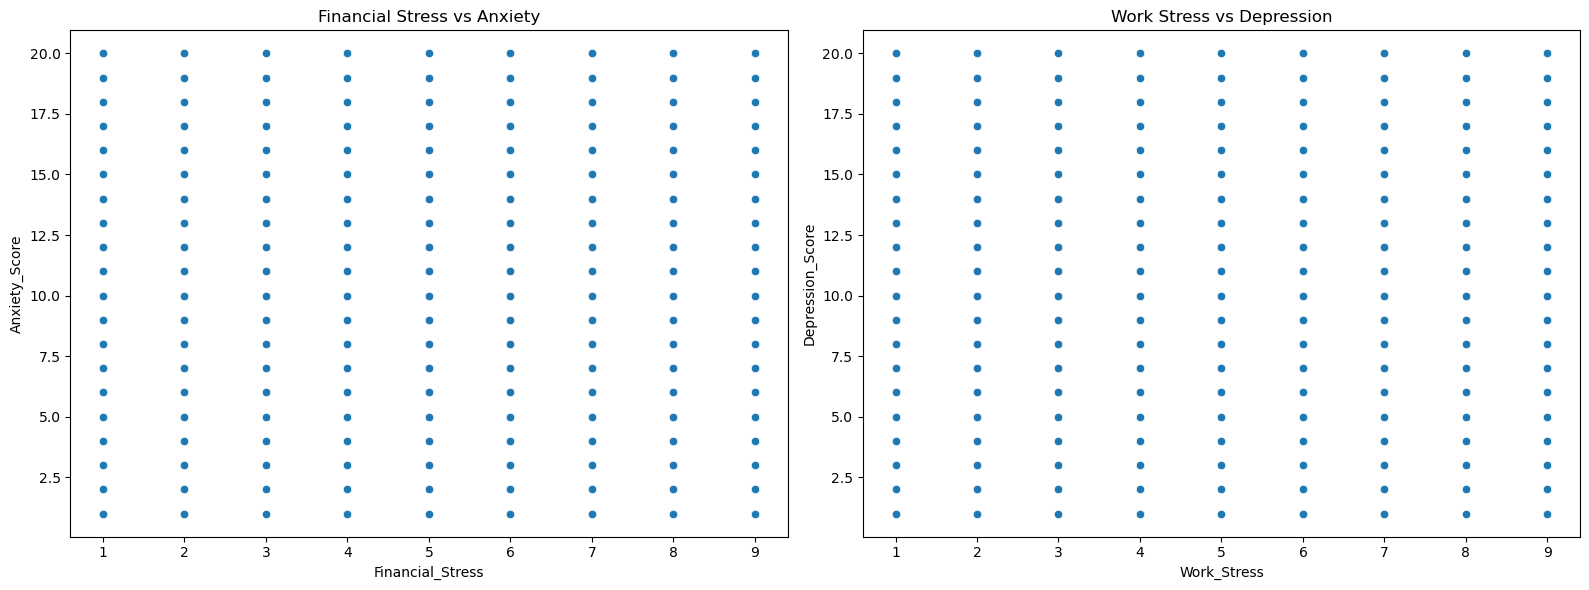

In [40]:
# Objective 4: 
# Work/Financial Stress vs Anxiety and Depression
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data=full_data, x='Financial_Stress', y='Anxiety_Score', ax=axes[0])
axes[0].set_title('Financial Stress vs Anxiety')
sns.scatterplot(data=full_data, x='Work_Stress', y='Depression_Score', ax=axes[1])
axes[1].set_title('Work Stress vs Depression')
plt.tight_layout()
plt.show()


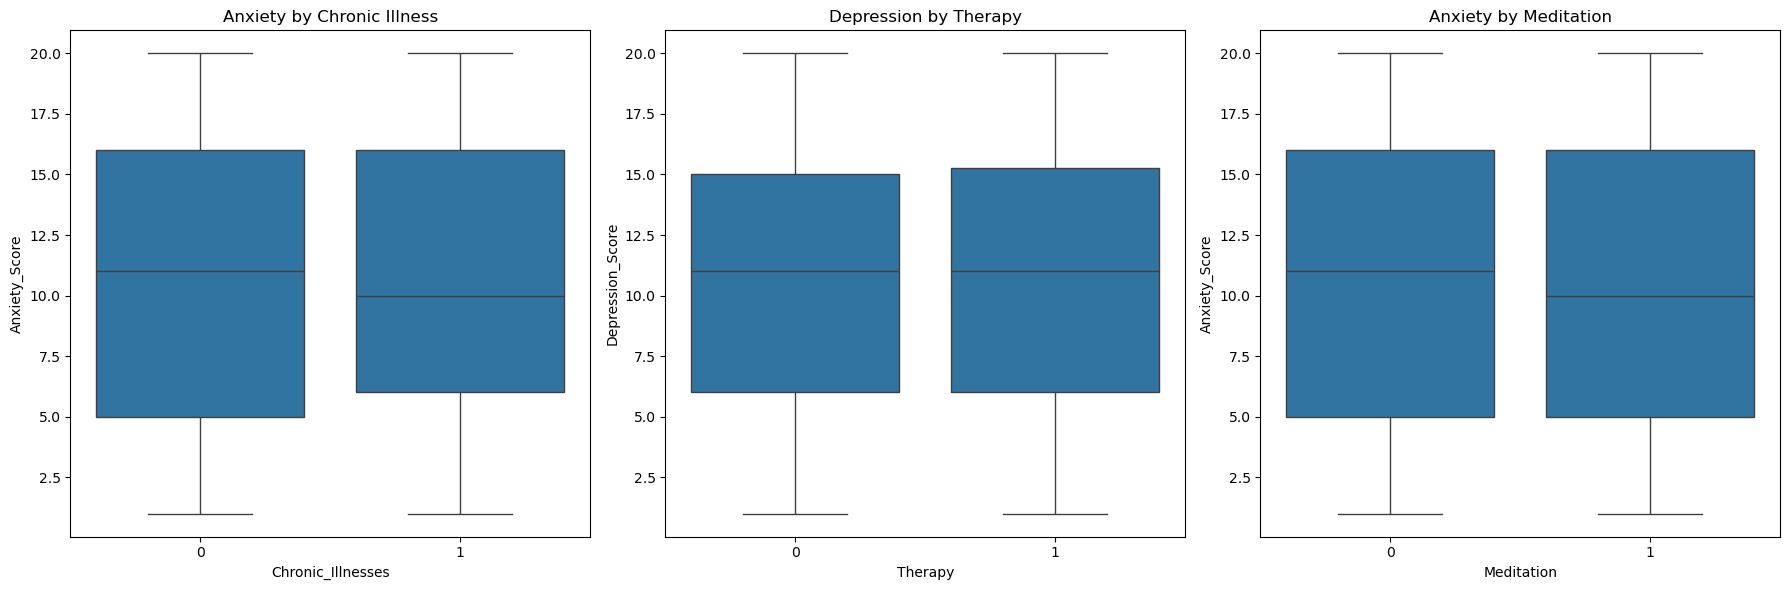

In [41]:
# Objective 5: 
# Chronic illness, therapy, meditation on mental health
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(data=full_data, x='Chronic_Illnesses', y='Anxiety_Score', ax=axes[0])
axes[0].set_title('Anxiety by Chronic Illness')
sns.boxplot(data=full_data, x='Therapy', y='Depression_Score', ax=axes[1])
axes[1].set_title('Depression by Therapy')
sns.boxplot(data=full_data, x='Meditation', y='Anxiety_Score', ax=axes[2])
axes[2].set_title('Anxiety by Meditation')
plt.tight_layout()
plt.show()

<h2>Discussion of findings</h2>

🎯 <b>Objective 1:</b> Demographic Influence

    *Gender differences observed: Female participants show slightly higher median anxiety and depression scores.
    *Education level difference observed: Bacholor's degree holder show slightly higher median anxiety and depression scores.
    *Employment status: Those who are employed shows higher median anxiety while students shows higher depression scores. 

🎯 <b>Objective 2:</b> Lifestyle Factors

    More sleep and physical activity are mildly associated with lower anxiety and depression, but correlation is weak.
    Patterns suggest some protective effect from healthier routines.

🎯 <b>Objective 3:</b> Psychosocial Correlations
    
    Life satisfaction shows a weak positive correlation with anxiety score (~0.07).
    Family history of mental illness shows a weak positive correlation with depression score (~0.08).

    Social support and loneliness have very low correlations but may have nonlinear or interaction effects.

🎯 <b>Objective 4:</b> Work and Financial Stress

    Positive trends observed.
    Financial stress increases with anxiety.
   

🎯 <b>Objective 5:</b> Chronic Illness, Therapy, Meditation

    lower anxiety among those with chronic illness.
    Those undergoing therapy show slightly higher depression—may reflect severity before treatment.
    Meditation users tend to have slightly lower anxiety.